# 6.6 Sourcing & Analyzing Time Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

# 1. Importing Libraries & Data

In [15]:
conda install quandl

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/wiltonngo/opt/anaconda3

  added / updated specs:
    - quandl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    more-itertools-8.12.0      |     pyhd3eb1b0_0          49 KB
    quandl-3.6.1               |   py39hecd8cb5_0          53 KB
    ------------------------------------------------------------
                                           Total:         102 KB

The following NEW packages will be INSTALLED:

  more-itertools     pkgs/main/noarch::more-itertools-8.12.0-pyhd3eb1b0_0
  quandl             pkgs/main/osx-64::quandl-3.6.1-py39hecd8cb5_0



quandl-3.6.1         | 53 KB     | ##################################### | 100

In [16]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [22]:
# Configure API key 

quandl.ApiConfig.api_key = '8rhdzXbhtkxphcnsa3oo'

In [34]:
# Importing the Inflation Rates Data variable.

data = quandl.get('RATEINF/CPI_DEU')

### I chose this dataset because I wanted to see if Germany inflation the rise of Products will increase the prices of home.

In [35]:
data.head(5)

,Value
Date,
1991-01-31,64.0
1991-02-28,64.3
1991-03-31,64.3
1991-04-30,64.5
1991-05-31,64.7


In [36]:
data.shape

(388, 1)

In [37]:
type(data)

pandas.core.frame.DataFrame

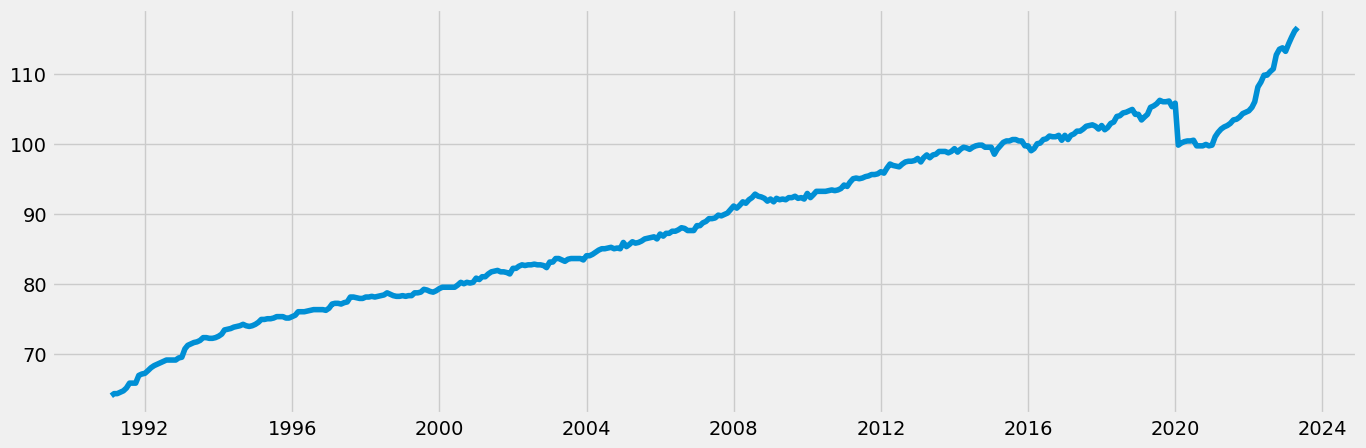

In [38]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

# 2.Subsetting,wrangling and Cleaning Time Series Data 

In [39]:
# Reset index so that you can use the "Date" column as a filter

data_2 = data.reset_index()

In [40]:
data_2.head()

,Date,Value
0,1991-01-31,64.0
1,1991-02-28,64.3
2,1991-03-31,64.3
3,1991-04-30,64.5
4,1991-05-31,64.7


In [41]:
data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01') & (data_2['Date'] < '2024-06-01')]

In [42]:
data_sub.shape

(280, 2)

In [43]:
data_sub.head()

,Date,Value
108,2000-01-31,79.5
109,2000-02-29,79.5
110,2000-03-31,79.5
111,2000-04-30,79.5
112,2000-05-31,79.5


In [45]:
 #Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-31,79.5
2000-02-29,79.5
2000-03-31,79.5
2000-04-30,79.5
2000-05-31,79.5


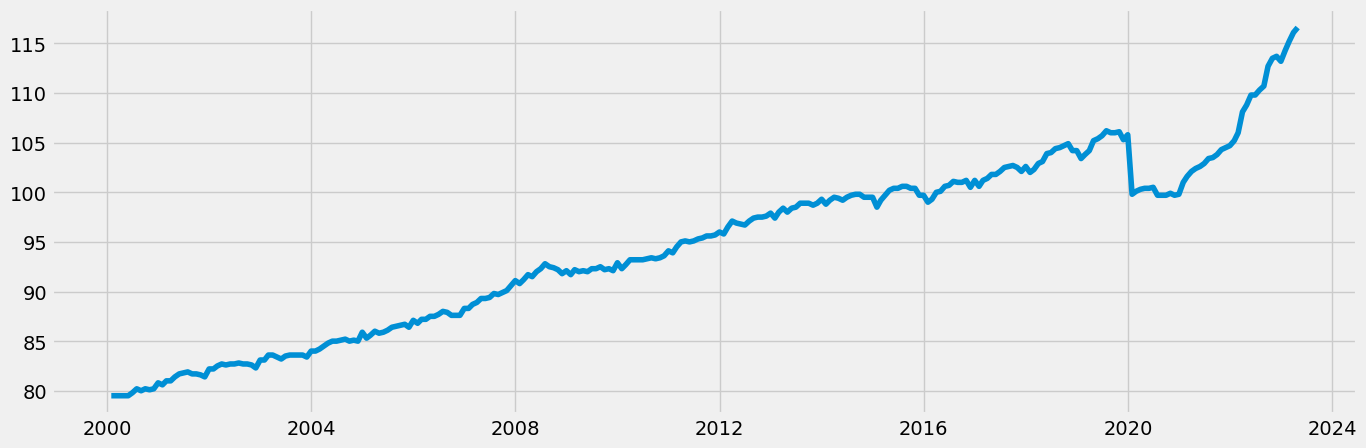

In [46]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [47]:
# Check for missing values (you shouldn't have any)

data_sub.isnull().sum() 

Value    0
dtype: int64

In [48]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()



113

In [50]:
#Remove Duplicates
data_sub.drop_duplicates()

,Value
datetime,
2000-01-31,79.5
2000-06-30,79.8
2000-07-31,80.2
2000-08-31,80.0
2000-10-31,80.1
...,...
2022-12-31,113.2
2023-01-31,114.3
2023-02-28,115.2


# Time Series analysis: Decompisition

In [51]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [52]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

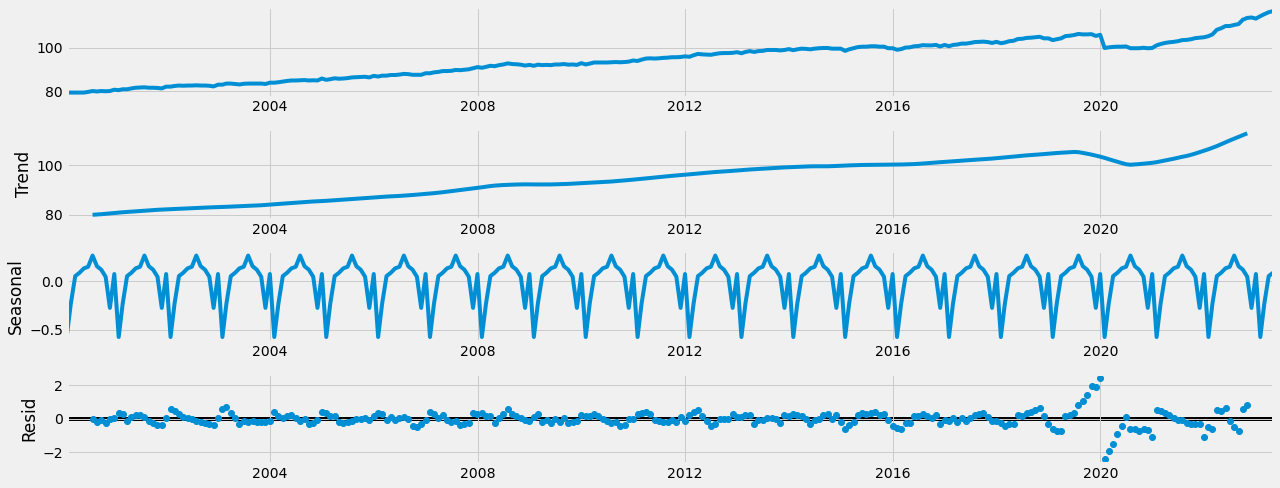

In [53]:
# Plot the separate components

decomposition.plot()
plt.show()

### The trend in the chart gradually increases then in 2020 it decreases then it gradually increase again.. The prices started to drop in 2020 then it started to increase again. Seasonality will fluctations bewteen holidays and prices of inflation will drop and increases again for a hosrt time. It will be flat if there is Seasonality.

# Testing for Stationarity

In [54]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   0.863597
p-value                          0.992596
Number of Lags Used              2.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


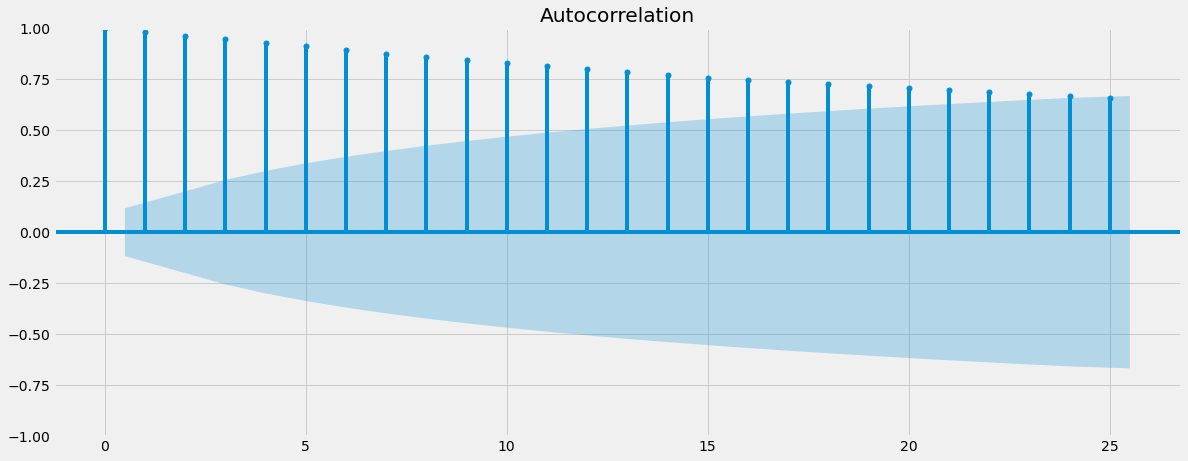

In [55]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

### When the lives go above the edge of confidence interbal we can deduce that our data is non-stationary by the amount of lags beyond the ineral. We can see the inflation have alot of lags correlated to each other. Theres alot of autocorrelated data and set is likely non stationary, with the rest of Dickey-Fuller Test

# Stationarizing The Inflation Rates

In [56]:
data_diff = data_sub - data_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [57]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [58]:
data_diff.head()

,Value
datetime,
2000-02-29,0.0
2000-03-31,0.0
2000-04-30,0.0
2000-05-31,0.0
2000-06-30,0.3


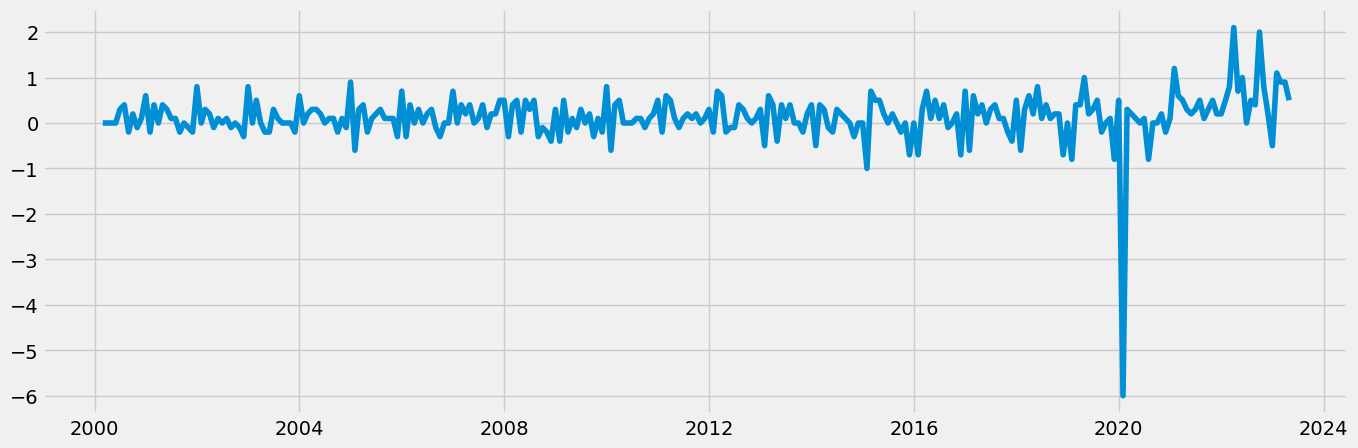

In [59]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [60]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.575891
p-value                          0.098083
Number of Lags Used             11.000000
Number of Observations Used    267.000000
Critical Value (1%)             -3.455081
Critical Value (5%)             -2.872427
Critical Value (10%)            -2.572571
dtype: float64


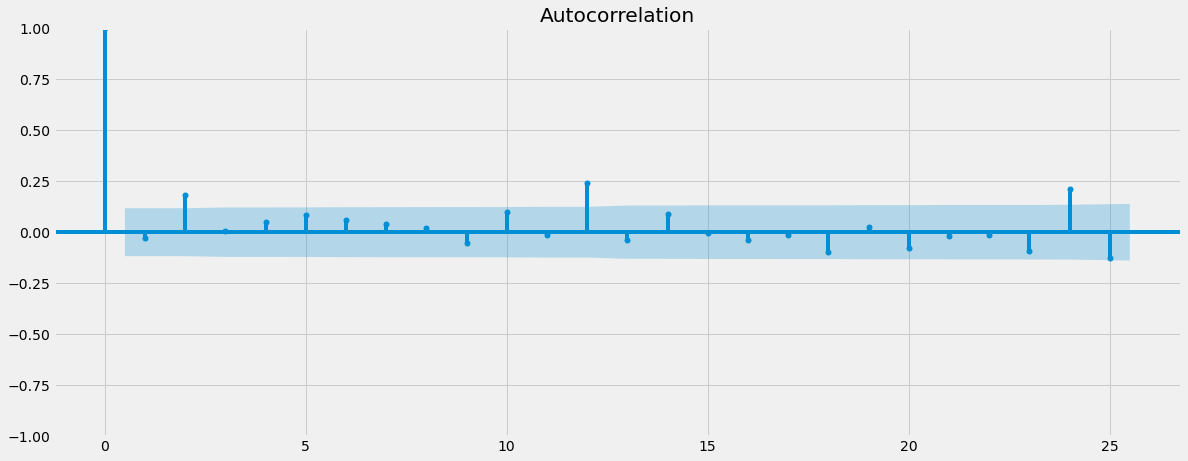

In [61]:
plot_acf(data_diff)
plt.show()

### Although the autocorrelation plot has improved (there are fewer autocorrelated terms), it is still not perfect. This means that even though the Dickey-Fuller test says that the data is stationary, that stationarity is weak. I could do another round of differentiation to further park it and reduce the autocorrelated terms but I stop here. This is because of the unspoken rule of thumb that you need at least ten significant lags (or ten vertical lines above the confidence interval) for a second round of differentiation to be necessary."